<a href="https://colab.research.google.com/github/sarthaknarang060402/PlacementPredictor/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Engineering Placements Predictor

## Importing The Modules

In [644]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [645]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Reading the Dataset

In [646]:
df=pd.read_csv("/content/collegePlace.csv")
df.head(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
8,21,Male,Computer Science,2,6,0,0,1
9,21,Female,Computer Science,1,6,1,0,0


In [647]:
df.shape

(2966, 8)

In [648]:
df.ndim

2

In [649]:
df.size

23728

In [650]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [651]:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


##Checking Null Values and Duplicates

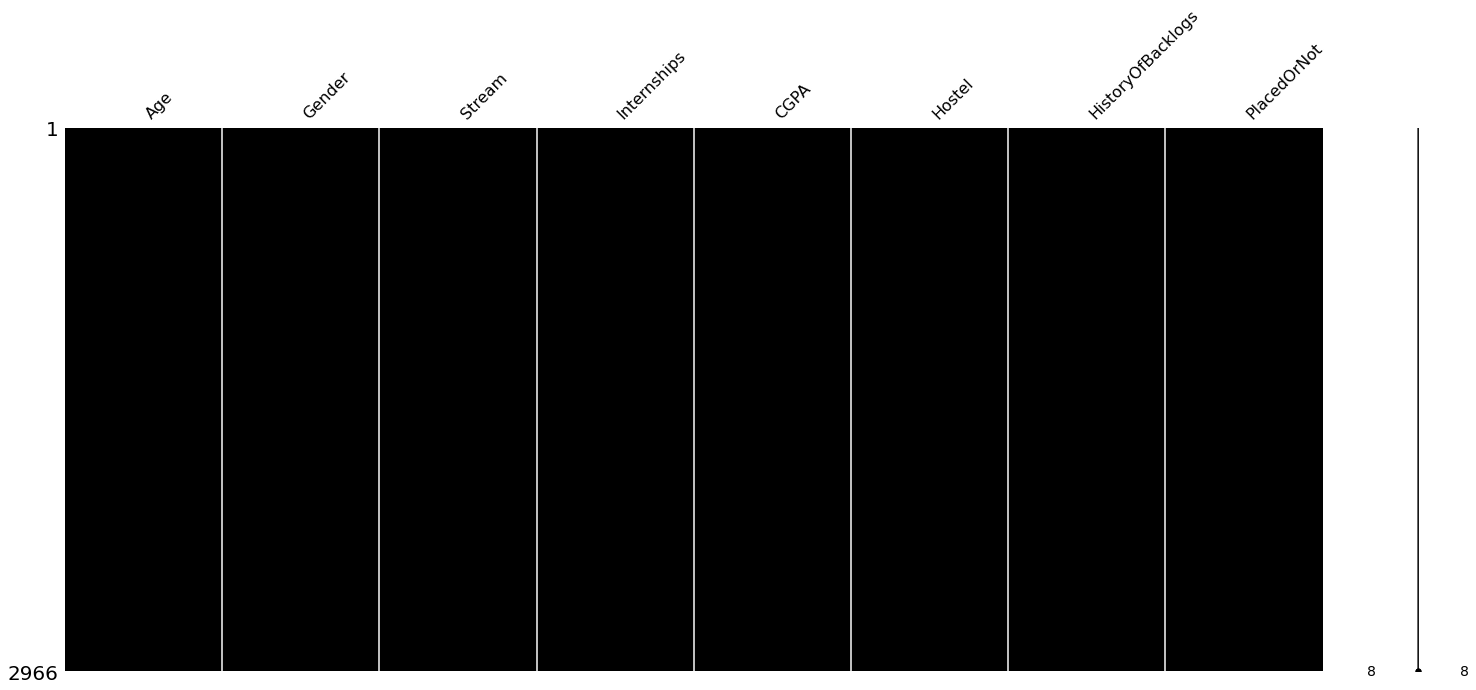

In [653]:
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [654]:
df=df.dropna()

In [655]:
df.duplicated().sum()

1829

In [656]:
df.drop_duplicates(inplace=True)

In [657]:
df.duplicated().sum()

0

In [658]:
df.skew()

Age                  0.817990
Internships          0.697572
CGPA                 0.122766
Hostel               0.699651
HistoryOfBacklogs    0.892883
PlacedOrNot         -0.322920
dtype: float64

OBSERVATIONS:-
1.   Age distribution is highly skew.
2.   Interships distribution is moderated skew.
3.   CGPA distribution is fairly symmetrical skewed.
4.   Hostel distribution is moderated skewed.
5.   HistoryOfBacklogs distribution is highly skewed.
6.   PlaceOrNot distribution is moderated skew.

##Analysing Data

In [659]:
round(df.describe(exclude = 'object'), 2)

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,1137.00,1137.00,1137.00,1137.00,1137.00,1137.00
mean,21.64,0.85,6.99,0.34,0.30,0.58
std,1.72,0.83,1.07,0.47,0.46,0.49
min,19.00,0.00,5.00,0.00,0.00,0.00
25%,21.00,0.00,6.00,0.00,0.00,0.00
50%,21.00,1.00,7.00,0.00,0.00,1.00
75%,22.00,1.00,8.00,1.00,1.00,1.00
max,30.00,3.00,9.00,1.00,1.00,1.00


In [660]:
round(df.describe(exclude = ['float', 'int64']),2)

,Gender,Stream
count,1137,1137
unique,2,6
top,Male,Computer Science
freq,846,243


In [661]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')

print('Numeric Column name',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head()

Number of numerical variables:  6


Numeric Column name ['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']




,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1


In [662]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(cat_features))
print("\n")

print('Categorical Column name',cat_features)
print('\n')
# visualise the numerical variables........
df[cat_features].head()

Number of categorical variables:  2


Categorical Column name ['Gender', 'Stream']




,Gender,Stream
0,Male,Electronics And Communication
1,Female,Computer Science
2,Female,Information Technology
3,Male,Information Technology
4,Male,Mechanical


###Analysing Age

In [663]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Age'}}
df_no_of_uniq=df_nunique['Age'].sort_index()
df_no_of_uniq

,Age
19,106
20,172
21,302
22,282
23,123
24,83
25,22
26,42
28,3
29,1


In [664]:
print('Maximum age of the students:',df['Age'].max())
print('Manimum age of the students:',df['Age'].min())
print('Average age of the students:',df['Age'].mean())

Maximum age of the students: 30
Manimum age of the students: 19
Average age of the students: 21.641160949868073


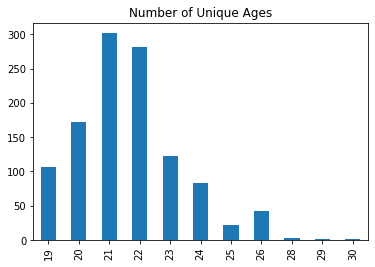

In [665]:
df_no_of_uniq['Age'].plot(kind="bar", title="Number of Unique Ages")

###Analysing Internships

In [666]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Internships'}}
df_no_of_uniq=df_nunique['Internships'].sort_index()
df_no_of_uniq

,Internships
0,445
1,461
2,186
3,45


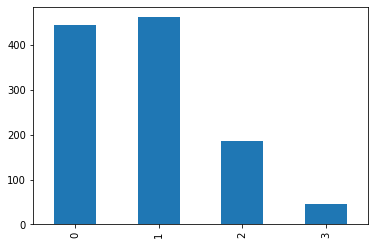

In [667]:
df_no_of_uniq['Internships'].plot(kind="bar")

###Analysing CGPA

In [668]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'CGPA'}}
df_no_of_uniq=df_nunique['CGPA'].sort_index()
df_no_of_uniq

,CGPA
5,76
6,327
7,367
8,268
9,99


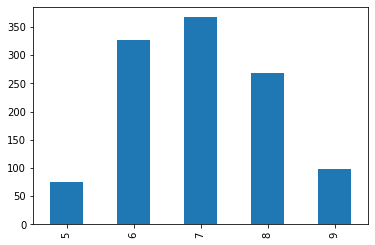

In [669]:
df_no_of_uniq['CGPA'].plot(kind="bar")

###Analysing Hostel

In [670]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Hostel'}}
df_no_of_uniq=df_nunique['Hostel'].sort_index()
df_no_of_uniq

,Hostel
0,756
1,381


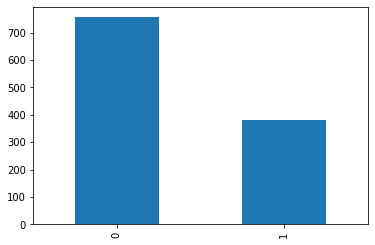

In [671]:
df_no_of_uniq['Hostel'].plot(kind="bar")

###Analysing HistoryOfBacklogs

In [672]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'HistoryOfBacklogs'}}
df_no_of_uniq=df_nunique['HistoryOfBacklogs'].sort_index()
df_no_of_uniq

,HistoryOfBacklogs
0,800
1,337


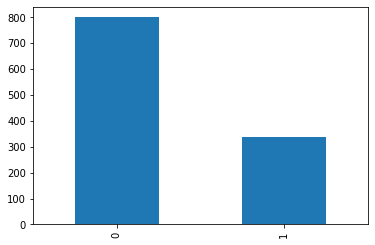

In [673]:
df_no_of_uniq['HistoryOfBacklogs'].plot(kind="bar")

###Analysing PlacedOrNot

In [674]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'PlacedOrNot'}}
df_no_of_uniq=df_nunique['PlacedOrNot'].sort_index()
df_no_of_uniq

,PlacedOrNot
0,478
1,659


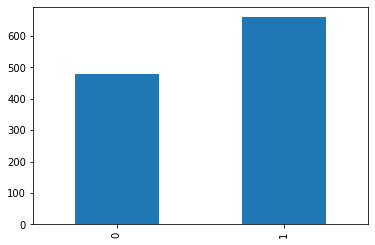

In [675]:
df_no_of_uniq['PlacedOrNot'].plot(kind="bar")

###Analysing Gender

In [676]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Gender'}}
df_no_of_uniq=df_nunique['Gender'].sort_index()
df_no_of_uniq

,Gender
Female,291
Male,846


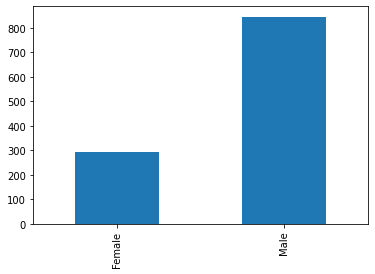

In [677]:
df_no_of_uniq['Gender'].plot(kind="bar")

###Analysing Stream

In [678]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'Stream'}}
df_no_of_uniq=df_nunique['Stream'].sort_index()
df_no_of_uniq

,Stream
Civil,152
Computer Science,243
Electrical,160
Electronics And Communication,174
Information Technology,243
Mechanical,165


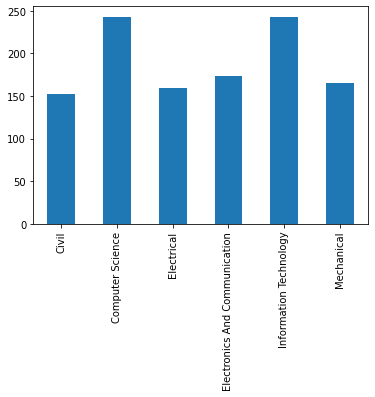

In [679]:
df_no_of_uniq['Stream'].plot(kind="bar")

###Age Vs PacedOrNot

In [680]:
df_new=pd.crosstab(df.Age,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
Age,,
19,43,63
20,73,99
21,121,181
22,134,148
23,67,56
24,24,59
25,5,17
26,11,31
28,0,3


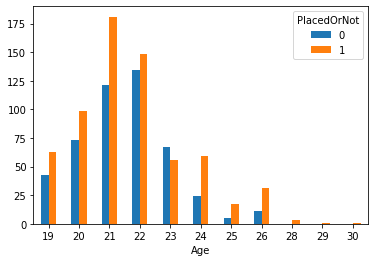

In [681]:
barplot = df_new.plot.bar(rot=0)

###Analysing Gender Vs PlacedOrNot

In [682]:
df_new=pd.crosstab(df.Gender,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
Gender,,
Female,131,160
Male,347,499


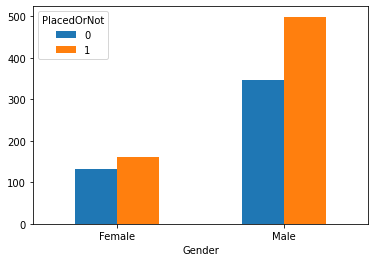

In [683]:
barplot = df_new.plot.bar(rot=0)

###Analysing Internships Vs PlacedOrNot

In [684]:
df_new=pd.crosstab(df.Internships,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
Internships,,
0,213,232
1,210,251
2,45,141
3,10,35


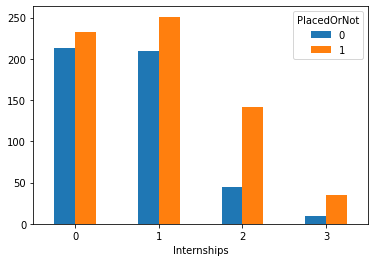

In [685]:
barplot = df_new.plot.bar(rot=0)

###Analysing CGPA Vs PlacedOrNot

In [686]:
df_new=pd.crosstab(df.CGPA,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
CGPA,,
5,71,5
6,183,144
7,224,143
8,0,268
9,0,99


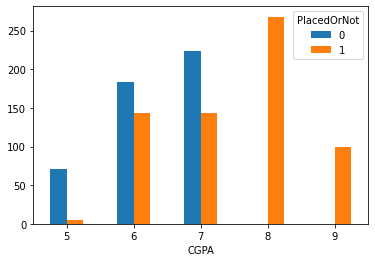

In [687]:
barplot = df_new.plot.bar(rot=0)

###Analysing Hostel Vs PlacedOrNot

In [688]:
df_new=pd.crosstab(df.Hostel,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
Hostel,,
0,305,451
1,173,208


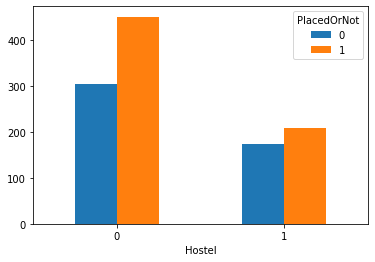

In [689]:
barplot = df_new.plot.bar(rot=0)

###Analysing Stream Vs PlacedOrNot

In [690]:
df_new=pd.crosstab(df.Stream,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
Stream,,
Civil,74,78
Computer Science,92,151
Electrical,73,87
Electronics And Communication,69,105
Information Technology,90,153
Mechanical,80,85


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

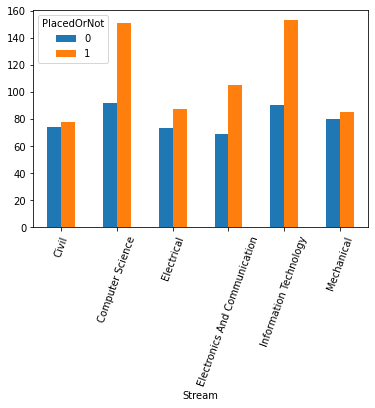

In [691]:
barplot = df_new.plot.bar(rot=0)
plt.xticks(rotation=70)

###Analysing HistoryOfBacklogs Vs PlacedOrNot

In [692]:
df_new=pd.crosstab(df.HistoryOfBacklogs,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
HistoryOfBacklogs,,
0,322,478
1,156,181


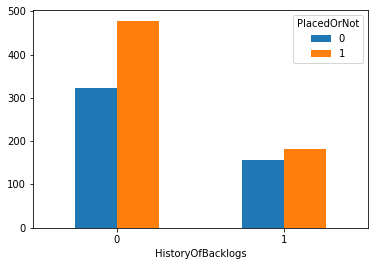

In [693]:
barplot = df_new.plot.bar(rot=0)

###Pair Plot

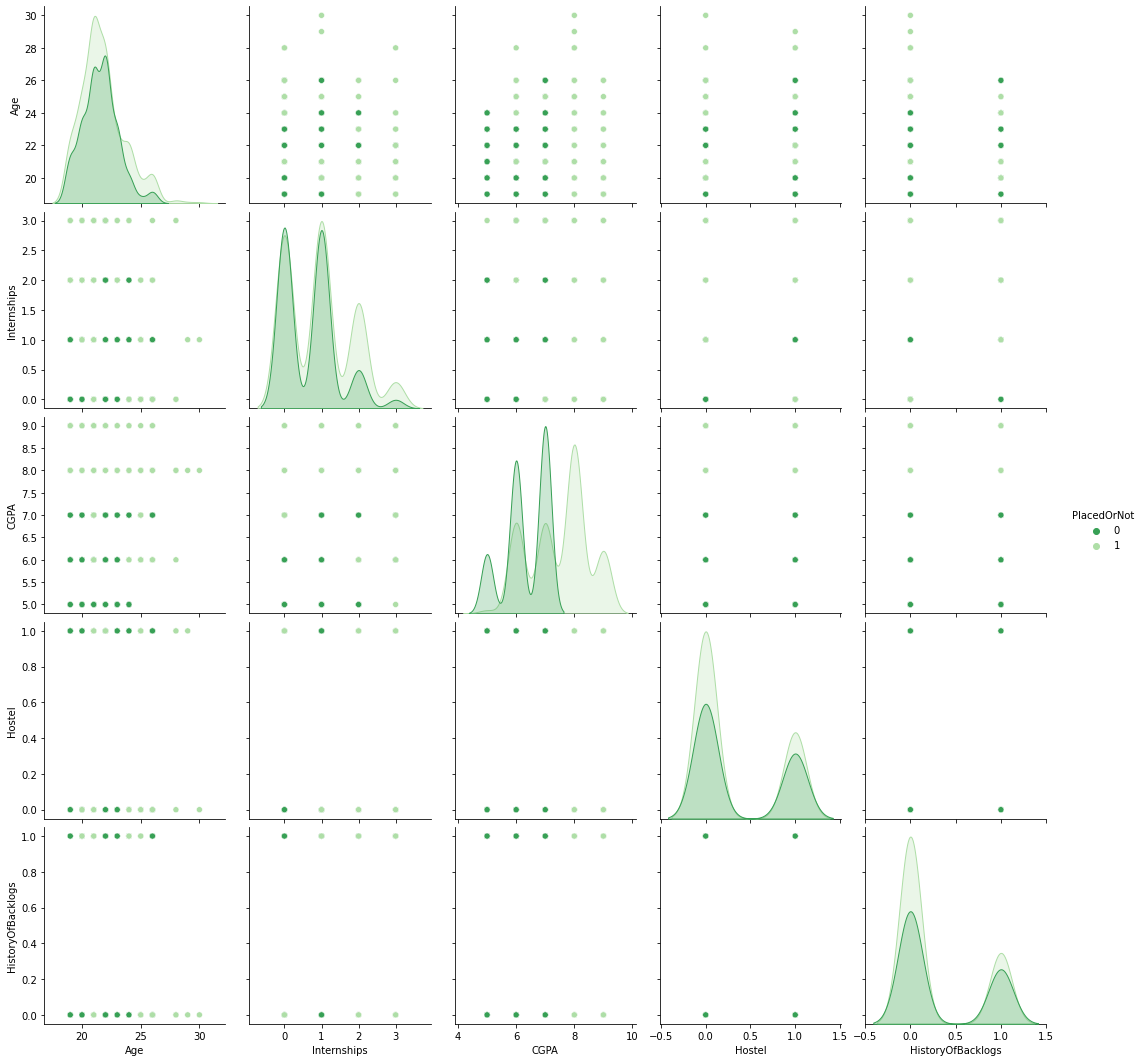

In [694]:
sns.pairplot(df,hue = 'PlacedOrNot',size = 3,palette='Greens_r')
plt.show()

###Correlations

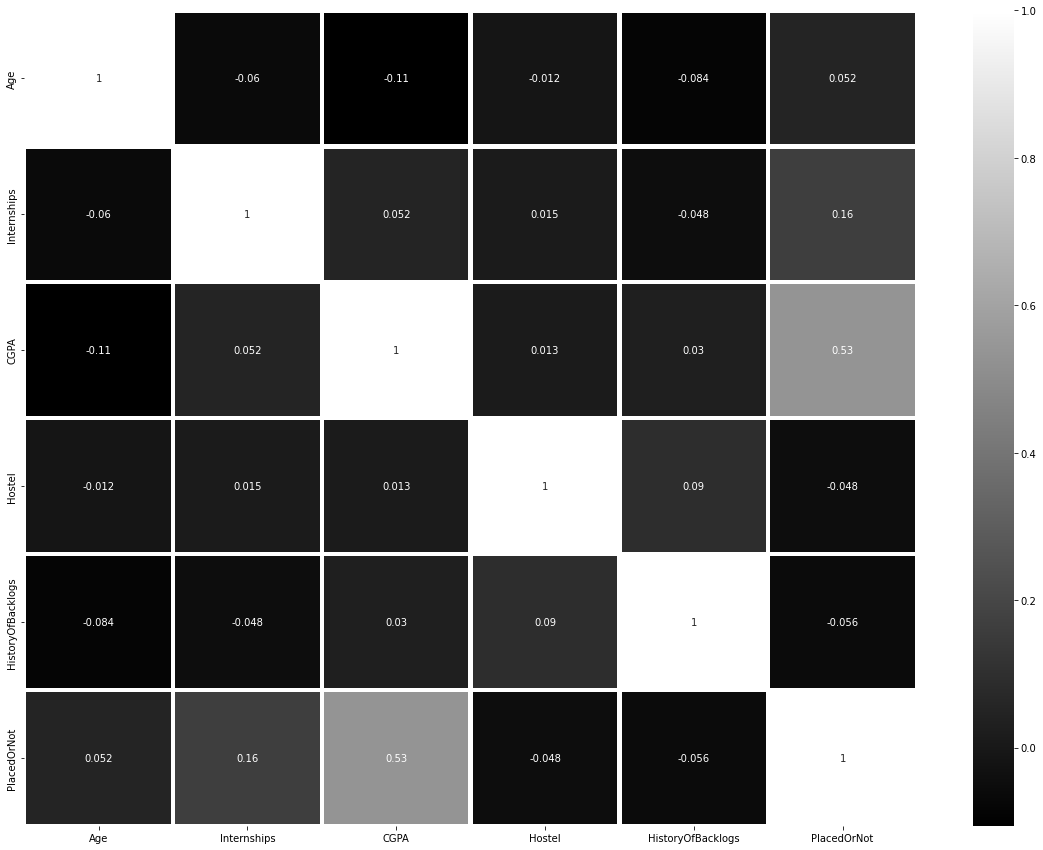

In [695]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="gist_yarg_r",linewidths=3.5,
    linecolor='white')

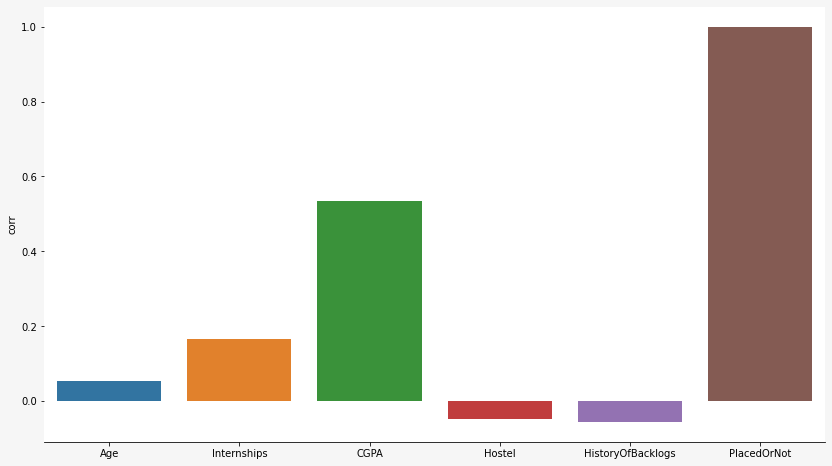

In [696]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(14,8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#c6ff1a"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

chart_df = pd.DataFrame(df.corrwith(df['PlacedOrNot']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0)


for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

##Data Preprocessing

####Null Values and Redundant have been dealt with in the Checking Null Values and Duplicates section above

###Problem With Age Feature:
* "Age" is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

* Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

* Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

* We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

In [697]:
#df['Age']=0
df.loc[(df['Age']>18)&(df['Age']<=22),'Student_Age']=1
df.loc[(df['Age']>22)&(df['Age']<=26),'Student_Age']=2
df.loc[(df['Age']>26)&(df['Age']<=30),'Student_Age']=3
df.loc[df['Age']>30,'Student_Age']=4


#Convert float t0 integer
df['Student_Age']=df['Student_Age'].astype(int)

In [698]:
df_new=pd.crosstab(df.Student_Age,df.PlacedOrNot,margins=True)
df_new.drop(df_new.tail(1).index,inplace=True)
df_new.drop(['All'],axis=1,inplace=True)
df_new

PlacedOrNot,0,1
Student_Age,,
1,371,491
2,107,163
3,0,5


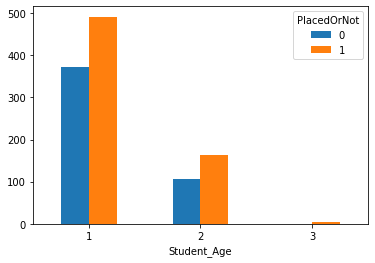

In [699]:
barplot = df_new.plot.bar(rot=0)

###Label Encoding on Gender

In [700]:
# Changing the Gender to 0 and 1
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Student_Age
0,22,1,Electronics And Communication,1,8,1,1,1,1
1,21,0,Computer Science,0,7,1,1,1,1
2,22,0,Information Technology,1,6,0,0,1,1
3,21,1,Information Technology,0,8,0,1,1,1
4,22,1,Mechanical,0,8,1,0,1,1


###Dropping Unneeded Features

In [701]:
df.drop(['Age'], axis = 1,inplace = True)
df.drop(['Hostel'], axis = 1,inplace = True)

In [702]:
df.head()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,Student_Age
0,1,Electronics And Communication,1,8,1,1,1
1,0,Computer Science,0,7,1,1,1
2,0,Information Technology,1,6,0,1,1
3,1,Information Technology,0,8,1,1,1
4,1,Mechanical,0,8,0,1,1


###Encoding Categorical Features(Dummy Encoding)

In [703]:
dummy_stream = pd.get_dummies(df['Stream'])

In [704]:
df = pd.concat([df.drop(["Stream"], axis = 1),dummy_stream], axis = 1)
df.head(5)

,Gender,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,Student_Age,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,1,8,1,1,1,0,0,0,1,0,0
1,0,0,7,1,1,1,0,1,0,0,0,0
2,0,1,6,0,1,1,0,0,0,0,1,0
3,1,0,8,1,1,1,0,0,0,0,1,0
4,1,0,8,0,1,1,0,0,0,0,0,1


In [705]:
#Rearrange columns
df = df[['Student_Age','Gender','Civil', 'Computer Science', 'Electrical',
       'Electronics And Communication', 'Information Technology',
       'Mechanical', 'Internships', 'CGPA', 'HistoryOfBacklogs','PlacedOrNot']]

df.head(15)

,Student_Age,Gender,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,1,0,0,0,1,0,0,1,8,1,1
1,1,0,0,1,0,0,0,0,0,7,1,1
2,1,0,0,0,0,0,1,0,1,6,0,1
3,1,1,0,0,0,0,1,0,0,8,1,1
4,1,1,0,0,0,0,0,1,0,8,0,1
5,1,1,0,0,0,1,0,0,0,6,0,0
6,1,1,0,1,0,0,0,0,0,7,1,0
7,1,1,0,0,0,0,1,0,1,7,0,0
8,1,1,0,1,0,0,0,0,2,6,0,1
9,1,0,0,1,0,0,0,0,1,6,0,0


##Scaling The Dataset

In [706]:
scaler = StandardScaler()
scaler.fit(df.drop('PlacedOrNot',axis=1))
scaled_features = scaler.transform(df.drop('PlacedOrNot',axis=1))

In [707]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head(10)

,Student_Age,Gender,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical,Internships,CGPA,HistoryOfBacklogs
0,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,2.352548,-0.521356,-0.412011,0.178784,0.947780,1.540742
1,-0.558516,-1.705056,-0.392829,1.918075,-0.404681,-0.425071,-0.521356,-0.412011,-1.024040,0.010714,1.540742
2,-0.558516,-1.705056,-0.392829,-0.521356,-0.404681,-0.425071,1.918075,-0.412011,0.178784,-0.926352,-0.649038
3,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,-0.425071,1.918075,-0.412011,-1.024040,0.947780,1.540742
4,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,-0.425071,-0.521356,2.427120,-1.024040,0.947780,-0.649038
5,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,2.352548,-0.521356,-0.412011,-1.024040,-0.926352,-0.649038
6,-0.558516,0.586491,-0.392829,1.918075,-0.404681,-0.425071,-0.521356,-0.412011,-1.024040,0.010714,1.540742
7,-0.558516,0.586491,-0.392829,-0.521356,-0.404681,-0.425071,1.918075,-0.412011,0.178784,0.010714,-0.649038
8,-0.558516,0.586491,-0.392829,1.918075,-0.404681,-0.425071,-0.521356,-0.412011,1.381608,-0.926352,-0.649038
9,-0.558516,-1.705056,-0.392829,1.918075,-0.404681,-0.425071,-0.521356,-0.412011,0.178784,-0.926352,-0.649038


##Making the Model

In [708]:
X = scaled_features
y = df['PlacedOrNot']

###Splitting the Dataset

In [709]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

###Visualize Model Score

In [710]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [711]:
# Cross validation on differnet set of algorithm!!!

kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)

rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})


,CrossVal_Score_Means,CrossValerrors,Algorithm
0,0.787386,0.035952,RandomForestClassifier
1,0.794937,0.038100,AdaBoostClassifier
2,0.752197,0.040649,Gradient Boosting
3,0.745871,0.039462,ExtraTreesClassifier
4,0.748384,0.041769,DecisionTreeClassifier


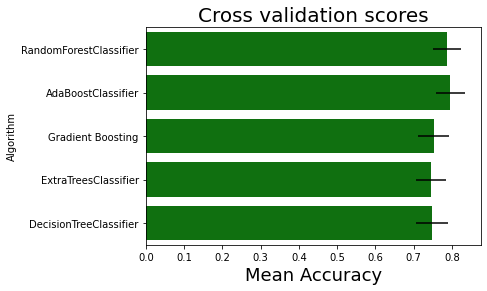

<Figure size 864x576 with 0 Axes>

In [724]:
g = sns.barplot("CrossVal_Score_Means","Algorithm",data = cv_df,orient = "h",**{'xerr':cv_std},color ='green')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 20)
plt.figure(figsize = (12,8))
cv_df

Hence best is AdaBoost





###Hyper-Parameter Tuning

In [713]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [714]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)  

In [715]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7962264150943397


**Using the Best Parameters to make the model**

In [716]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                min_samples_leaf=2)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [717]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 120}
0.7887974683544303


In [718]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME.R', learning_rate = 0.001, n_estimators = 120)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=2),
                   learning_rate=0.001, n_estimators=120)

In [719]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       153
           1       0.90      0.75      0.82       189

    accuracy                           0.82       342
   macro avg       0.82      0.82      0.82       342
weighted avg       0.83      0.82      0.82       342



In [720]:
print(accuracy_score(y_test, y_pred))

0.8157894736842105


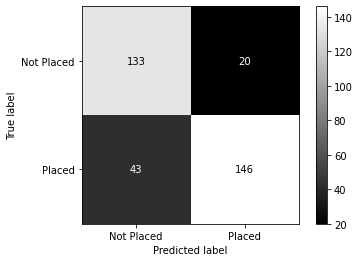

In [721]:
plot_confusion_matrix(ada,
                      X_test, y_test,
                      cmap=plt.cm.gist_yarg_r,
                      display_labels = ['Not Placed', 'Placed'])
plt.grid(False)
plt.show();

##Final Feature Importances

In [722]:
feature = pd.Series(ada.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

CGPA                             6.433434e-01
Internships                      1.738371e-01
Student_Age                      8.035230e-02
HistoryOfBacklogs                4.827764e-02
Civil                            2.486744e-02
Information Technology           1.329614e-02
Mechanical                       8.139147e-03
Computer Science                 4.165880e-03
Gender                           3.720927e-03
Electronics And Communication    5.707991e-15
Electrical                       4.013301e-15
dtype: float64


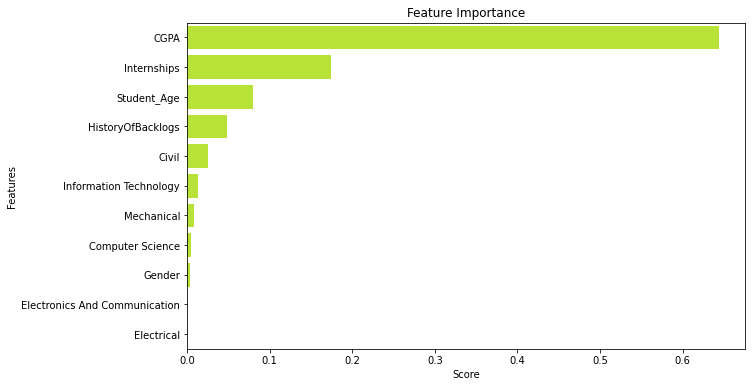

In [723]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index,color = '#c6ff1a')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()